# Regression models for House Pricing
In the last exercise we have prepared our dataset so that we can feed it to a machine learning model for regression. Building such a regression model will be the task of this exercise.

First, we **import** the standard libraries **numpy** as np and **pandas** as pd. Afterwards, we **read the pickled data** from the previous exercise. Therefore, use the Pandas method **read_pickle()** with the filenames 'house_train.pkl' and 'house_test.pkl' as the argument. Call the resulting dataframes **train** and **test**.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Load dataframes
train = pd.read_pickle('houses_train.pkl')
test = pd.read_pickle('houses_test.pkl')

Before we train a model let us **separate** the **features** and the **target**. Hence, **create** variables called **X_train** and **X_test** which include all the features from the training and test data, respectively, and variables called **y_train**, and **y_test** which contain only the target ('SalePrice').

In [7]:
# Separate features and target
#X_train = train.drop(['SalePrice'], axis=1)
#X_test = test.drop(['SalePrice'], axis=1)
#y_train = train['SalePrice']
#y_test = test['SalePrice']

In [4]:
# Separate features and target
X_train, X_test = train.drop(['SalePrice'], axis=1), test.drop(['SalePrice'], axis=1)
y_train, y_test = train['SalePrice'], test['SalePrice']

## Regression Tree
Finally, we can train our first model: a regression tree. For this reason we import the following class:

In [5]:
# Just execute
from sklearn.tree import DecisionTreeRegressor

Please **create an object of that class called tree_reg**. As the argument of the constructor use **random_state=42**. For all the other parameters we use the default values. If you are interested in the possible arguments and default settings you can use 'Shift+Tab' or you may have a look at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.

In [6]:
# Create object of class DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

Next, use the **fit(x,y)** method of the tree_reg object to train the model. As the argument use the training dataset **(X_train, y_train)**. The return value of that method is again the decision tree object, but this time with fitted model parameters.

In [7]:
# Train the model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Instead of a transform method like for the preprocessing objects (e.g. Imputer), machine learning models have **predict(X) methods**. For further details please have a look at the documentation.

Next, we want to use that predict method to compute predictions for house prices on our test dataset. Hence, please use the **predict** method of the tree_reg object on the test data **X_test** and save the result to a variable called **y_pred**.

In [8]:
# Compute predictions for the test data
y_pred = tree_reg.predict(X_test)
y_pred

array([148000., 410000., 109900., 210000., 377500.,  88000., 205000.,
       130000.,  97000., 118964., 189950., 106500., 108500., 220000.,
       179000., 135000., 185000., 135000., 113000., 179600., 104900.,
       235128., 183200., 116000., 194000., 176432., 164990., 109900.,
       168000., 196000., 128000., 242000., 169000., 100000., 256300.,
       148000.,  91500., 170000., 290000., 116000., 105500., 263000.,
       118000., 372500., 126500., 139000., 112500., 125000., 501837.,
       128500., 105000., 184000., 124000., 424870., 140000., 214000.,
       176000., 142500., 139950., 124000.,  72500., 168500., 354000.,
       239000., 249700., 235000., 116050., 325624., 123600., 168500.,
       118964., 125000., 121600., 110000., 555000., 179200., 290000.,
       271900., 141000., 119900.,  89500.,  98300., 132250.,  82500.,
       182900., 125000., 270000., 260000., 143000., 200141., 124900.,
       197500., 127500., 294000.,  87000., 181000., 129900., 146000.,
       221500., 2000

The return value is again a numpy array. We want to **compare** these values **to the true house prices** of the test dataset. For this reason, **construct** a dataframe called **results** which contains two columns: the true y values and the predictions. Call the two columns **'y_true'** and **'y_pred'**, respectively. Afterwards, print the first 10 values of the dataframe.

In [9]:
# Create result dataframe
results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
results.head(10)

,y_pred,y_true
892,148000.0,154500.0
1105,410000.0,325000.0
413,109900.0,115000.0
522,210000.0,159000.0
1036,377500.0,315500.0
614,88000.0,75500.0
218,205000.0,311500.0
1160,130000.0,146000.0
649,97000.0,84500.0
887,118964.0,135500.0


### Evaluation of our Results

At a first glance our results do not look that bad. Of course, we want to quantify the performance of the regression model by using a **performance metric**. One common metric, which has also been used by the construction of the regression tree, is the **mean squared error** (mse) which is the squared sum of the residuals. Please, perform the following steps to compute the mse: first, **add a new column called 'residuals'** which contains the residuals (**differences between y_pred and y_true**) to the results dataframe. Afterwards, take the **mean of the squared residuals** by using the mean function of numpy.

In [10]:
# Compute residuals and mse
results['residuals'] = (results['y_pred'] - results['y_true'])
np.mean(results['residuals']**2)

2162372855.6061645

Of course, we do not have to compute that metric manually ever time. **Sklearn provides a lot of different metrics** for regression and classification. Please, **import** the function **mean_squared_error** from the module **sklearn.metrics**. Afterwards, use that function to **crosscheck your result**. Furthermore, take the square root of the result. This gives the **root mean squared error** (rmse). It represents the sample standard deviation of the differences between predicted values and observed values.

In [11]:
# Import mse function
from sklearn.metrics import mean_squared_error

In [12]:
# Compute mse
print(mean_squared_error(y_test, y_pred))
np.sqrt(mean_squared_error(y_test, y_pred))

2162372855.6061645


46501.32100925913

Hopefully, you got the same result.

Next, let us **plot the predictions** against the true house price values. Therefore, you can use the **seaborn** function **lmplot**. As the arguments use **data=results** and **size=8** and set **x** and **y** to **'y_pred'** and **'y_true'**, respectively. However, do not forget to **import the module first** and to issue the command %matplotlib inline afterwards.

In [13]:
# Import seaborn
import seaborn as sns
%matplotlib inline

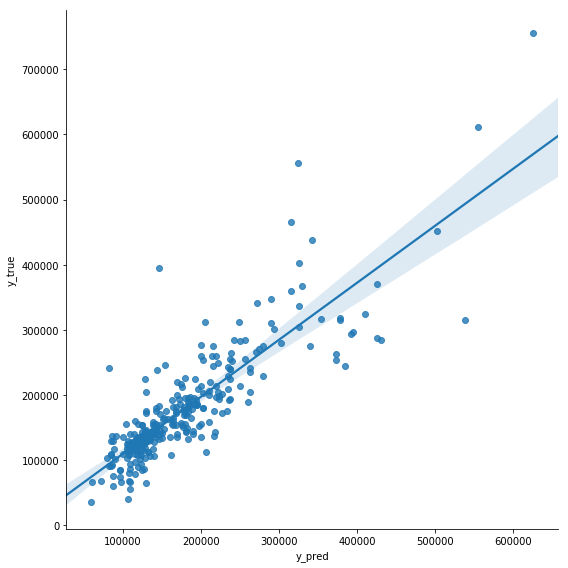

In [14]:
# Create lmplot
sns.lmplot(data=results, x='y_pred', y='y_true', size=8)

The results do not look that bad. Of course, we can see **a few outliers** which are always hard to predict. For a perfect model all the points would lie on the angle bisector.

Next, we look at the **distribution of the residuals**. Ideally, the residuals should be **normally distributed** around zero. If you will see a complete different shape you would have used a model which does not descibe the data very well and which is conceptually wrong. Can you think of an example?

Please, use the function **distplot** of seaborn to look at the distribution of the residuals.

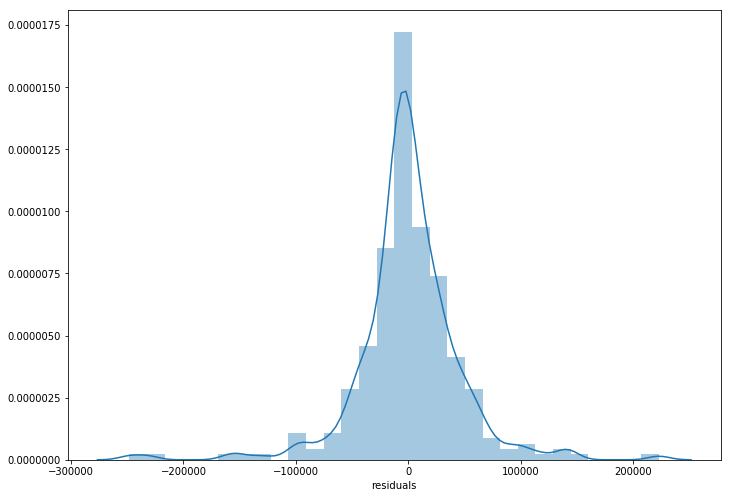

In [15]:
# Plot distribution of the residuals
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
#fig.fig_size=(16,20)
sns.distplot(results['residuals'], ax=ax, kde=True, bins=30)

This looks a bit like a normal distribution. However, we have large residuals for some outliers. Furthermore, the distribution is slighly right skewed. Do you have any idea why this could be the case?

In [16]:
# solution
# right skewed
(results['y_true'] - results['y_pred']).skew()

0.5210960360601105

During the theory part we have seen another performance measure for regression, the **r2 score**, which can be seen as the proportion of **explained variance** of the target with our model.

**Bonus:**

First, compute this score by hand. Therefore, compute the **sum of all squared residuals** and **divide it by the total sum of squares (proportional to the variance of y_true)**. Afterwards, **subtract the result from the value one**. Crosscheck your result with the **r2_score** function from the modul **sklearn.metrics**. The formula is given by

$$ r^2 = 1 - \frac{\sum_i residuals_i^2}{\sum_i(y_{true,i}- \bar{y}_{true})^2}, $$

where $\bar{y}_{true}$ represents the mean value of the observations.

In [17]:
# Compute r2 score by hand

# variance
numerator = (results['residuals']**2).sum()
numerator

denominator = ((results['y_true'] - results['y_true'].mean())**2).sum()
denominator
#denominator = (y_test.size)*np.var(y_test, axis=0)
#denominator = (y_test.size -1)*results['y_true'].var()

1 - numerator/denominator

0.7180859330884763

In [18]:
import sklearn.metrics

In [19]:
#sklearn.metrics.r2_score()

In [20]:
# Compute r2_score with sklearn function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7180859330884763

Actually, the mean squared error is not the best metric for our target variable although our model uses this measure during training. **Can you think of any problem with the mean squared error regarding the shape of our target**?

In [21]:
# solution
# If we make an error of 10% in the large house price region
# it contributes much more to the squared error than the same error (in percentage)
# in the low price region.

Maybe you came up with the actual problem. If not, we will explain that later during the discussion of the exercise. A possible solution to overcome this problem is taking the log of the house prices and using it as the new target.

Please, **create a new target variable** **y_test_log** and **y_train_log**. Afterwards, **retrain the model** and compute again the **lmplot** and the **r2_score** with the log data. 

**Hint**: Use np.log() and np.exp() for the transformations.

In [22]:
# Compute the log of the target variable
y_test_log = np.log(y_test)
y_train_log = np.log(y_train)

Train another model called **tree_reg_log** using the logarithmic target.

**Remark**: Instanciate a new DecisonTreeRegressor. Set the random_state again to 42.

In [23]:
# Train a new model
tree_reg_log = DecisionTreeRegressor(random_state=42)
tree_reg_log.fit(X_train, y_train_log)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Compute the logarithmic predictions using the test dataset.

In [27]:
# Compute log predictions on test data
y_pred_log = tree_reg_log.predict(X_test)

Add **two more columns** to the result dataframe containing the **logarithmic predictions** and **true logarithmic house price values**. Call the columns 'y_true_log' and 'y_pred_log'.

In [28]:
# Add result columns
results['y_true_log'] = y_test_log
results['y_pred_log'] = y_pred_log

Compute the r2_score for the log predictions and on the original data.

**Hint**: Use the inverse transformation.

In [29]:
# log r2
r2_score(y_test_log, y_pred_log)

0.7917915359861474

**Bonus**:

Compute the r2_score, the mse and rmse on the backtransformation of the log predictions and log observations.

**Hint**: Use the inverse transformation.

In [30]:
# original scale
r2_score(np.exp(y_test_log), np.exp(y_pred_log))

0.8364887652567667

In [31]:
# mse
print(mean_squared_error(np.exp(y_pred_log), np.exp(y_test_log)))
np.sqrt(mean_squared_error(np.exp(y_pred_log), np.exp(y_test_log)))

1254184509.0205479


35414.46751005227

Use lmplot to plot the log predictions against the true values.

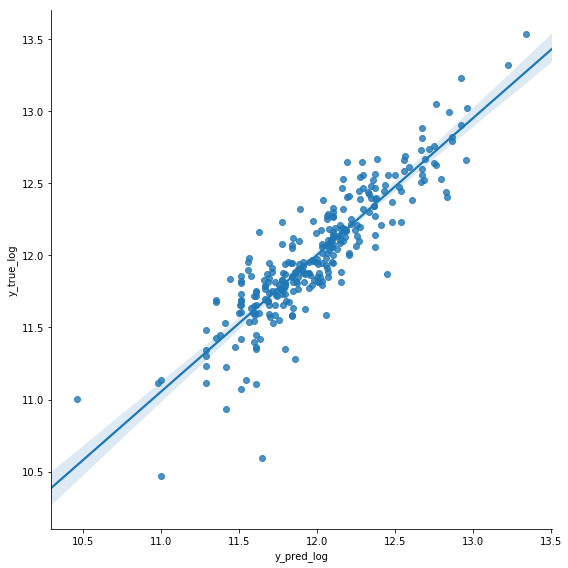

In [32]:
sns.lmplot(data=results, x='y_pred_log', y='y_true_log', size=8)

**Bonus**: 

Plot the distribution of the logarithmic residuals and of the back transformed residuals.

Furthermore, do the following: 

Think of a regression model with a single feature X and a target label y. If you train a regression tree, how many dimensions does the hyperrectangle have? To solve this task, please draw a scatter plot with a linear relationship between X and y. Furthermore, draw (in a qualitative way) four hyperrectangles into the graph and the regression predictions of the regression tree. In addition, draw a regression line of a linear model.

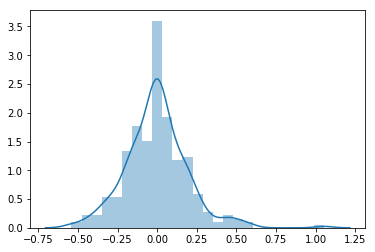

In [33]:
# Log residuals
sns.distplot(results['y_pred_log'] - results['y_true_log'])

In [34]:
# Left skewed
(results['y_pred_log'] - results['y_true_log']).skew()
(np.exp(results['y_pred_log']) - np.exp(results['y_true_log'])).skew()

-0.1892336541408263

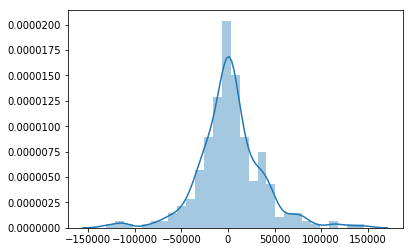

In [35]:
# Backtransformed residuals
sns.distplot(np.exp(results['y_true_log']) - np.exp(results['y_pred_log']))

### Visualization of the regression tree

In this part we want to visualize a regression tree. Since the previously trained trees have been built completely and not been pruned, the resulting plot would be way too large. Hence, we train another tree by setting the hyperparameter **max_depth** to **4**. Please create such a tree. Call the object **reg_tree_fixedDepth** and set the **random_state to 42**.

In [36]:
# Instanciate a tree with fixed max depth
reg_tree_fixedDepth = DecisionTreeRegressor(max_depth=4, random_state=42)

Train the new tree on the log data.

In [37]:
# Train tree
reg_tree_fixedDepth.fit(X_train, y_train_log)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

To visualize the tree we have to **import** the module **export_graphiz** **from** the module **sklearn.tree**. Please do so.

In [38]:
# Import export_graphiz
from sklearn.tree import export_graphviz

To export the tree, just execute the command below. Make sure that your tree object has exactly the same variable name.

In [39]:
# Just execute
export_graphviz(reg_tree_fixedDepth, out_file="tree_4_reg.dot",
                feature_names=X_train.columns.tolist(),
                filled=True, rounded=True)

Next, we have to render the tree.dot file. Therefore, we have to install another package. Open a terminal and execute the command **sudo apt install graphviz**. If the package has been installed, you can execute the command in the cell below. Afterwards, you should find an image of the tree in your jupyter home folder.

**Remark:** If you cannot install the package, you can copy the content of the tree.dot file to a web application http://webgraphviz.com/.

Can you describe the decision tree?

**Bonus**: Please try to recompute some of the *samples* and *values* for the first two levels. Remember, that the tree shows values of the training dataset and not the test dataset.

In [40]:
%%bash
dot -Tpng tree_4_reg.dot -o tree_4_reg.png

In [41]:
# First level
y_train_log_mean = y_train_log.mean()
y_train_log_mean
print(((y_train_log - y_train_log_mean)**2).sum() * 1 / y_train_log.size)
print(y_train_log.size)
print(y_train_log_mean)

0.1524443883027606
1168
12.0306518833246


In [42]:
# Left data
full_data = X_train.join(y_train_log)
value = full_data[full_data.OverallQual <= 6.5]['SalePrice'].mean()
print(((full_data[full_data.OverallQual <= 6.5]['SalePrice'] - value)**2).sum() 
      * 1 / full_data[full_data.OverallQual <= 6.5]['SalePrice'].size)
print(full_data[full_data.OverallQual <= 6.5]['SalePrice'].size)
print(value)

0.08018976127922274
726
11.82627265070141


In [43]:
# Right data
full_data = X_train.join(y_train_log)
value = full_data[full_data.OverallQual > 6.5]['SalePrice'].mean()
print(((full_data[full_data.OverallQual > 6.5]['SalePrice'] - value)**2).sum() 
      * 1 / full_data[full_data.OverallQual > 6.5]['SalePrice'].size)
print(full_data[full_data.OverallQual > 6.5]['SalePrice'].size)
print(value)

0.08982061967425937
442
12.366351708854987


## Random Forest

During the theory part we have already learned that a single tree overfits the data pretty often. Hence, an ensemble of uncorrelated trees like the random forest could be a better choice.

Please **import** the **RandomForestRegressor** from the module **sklearn.ensemble** and create an object **rf_reg**. Afterwards, train the model on the log data and compute the r2 score on the log data.

**Remark**: Set the random_state again to 42.

In [44]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

In [45]:
# Create object rf_reg
rf_reg = RandomForestRegressor(random_state=42)

In [46]:
# Train model on log data
rf_reg.fit(X_train, y_train_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
# Compute r2 score on log data
y_pred_log = rf_reg.predict(X_test)
r2_score(np.exp(y_test_log), np.exp(y_pred_log))

0.8564736188913291

In [48]:
# Compute r2 score on log data
y_pred_log = rf_reg.predict(X_test)
r2_score(y_test_log, y_pred_log)

0.8652169202983012

Hm, this is not much better. Maybe we should add more trees? Please, create **another RandomForest** and increase the **number of trees** to **n_estimators=1000** and set the **random_state** again to **42**. After the **model training** please compute again the **r2 score**.

In [49]:
# Create random forest with more trees and retrain and reevaluate the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=2)
rf_reg.fit(X_train, y_train_log)
y_pred_log = rf_reg.predict(X_test)
r2_score(y_test_log, y_pred_log)

0.8830423908404399

Hm, not much better, but at least a bit. Adding more trees never hurts, except the computation performance. However, at some point more trees do not improve the model at all.

### Feature Importance

Now, let us go on to compute the **feature importance**. The most important feature is the one which has reduced the mean squared error the most considering all the splits. The random forest (and also the decision tree) has an **attribute** called **_feature_importances**.

Please use that attribute and give the extracted result a new name called **feature_importances**. Afterwards, print the result.

In [50]:
# Extract feature importance
feature_importances = rf_reg.feature_importances_
feature_importances

array([2.04374921e-03, 1.62667888e-02, 5.48046046e-01, 1.01799888e-02,
       1.48715107e-02, 9.48593484e-03, 2.25838701e-03, 2.30359332e-02,
       3.48466884e-04, 6.30687674e-03, 4.42571543e-02, 1.96072025e-02,
       7.39340524e-03, 1.10542320e-04, 1.14967333e-01, 9.30674595e-04,
       3.36172216e-04, 1.14350521e-03, 9.29126558e-04, 1.77402769e-03,
       1.49643457e-03, 2.49470772e-03, 5.33079262e-03, 4.19222557e-03,
       4.17904477e-02, 2.39296996e-02, 4.11390258e-03, 7.46494337e-03,
       1.86465645e-03, 6.64055197e-05, 8.77810902e-04, 2.08673979e-04,
       1.52794855e-04, 3.98018289e-03, 1.69764085e-03, 5.77458155e-05,
       9.68082310e-05, 1.02638155e-03, 2.44700205e-03, 6.91839861e-06,
       7.02653450e-05, 2.58934935e-04, 1.49428750e-03, 2.03715847e-04,
       1.22269764e-04, 5.78909330e-04, 1.68715041e-07, 1.03378025e-04,
       1.18855571e-04, 3.85629269e-05, 5.40935671e-04, 4.77475197e-04,
       3.66645986e-05, 0.00000000e+00, 1.71360462e-05, 1.11502883e-04,
      

The result is an array which contains the proportion of the reduced mean squared error for each feature. Hence, summing over all values yields one. But which element corresponds to which feature? Fortunately, the order is the same as the column order in the feature dataframe X_train. Therefore, **extract the feature names** by accessing the **attribute columns** and transform it to a list by using the method **tolist()**. Call that list **features**.

In [51]:
# Create feature list
features = X_train.columns.tolist()

Next, we want to combine the feature names and the feature importances. There are several methods to do that.

One solution is creating a dataframe with those two columns:

Create a **dataframe** called **importance_df** using the *dictionary method* (pd.DataFrame(dict)). As keys of the dict use **'feature'** and **'importance'**, as the data use the arrays/lists **features** and **feature_importances**, respectively. Finally, **sort the dataframe** by the importance value in descending order and print the result.

In [52]:
# Create dataframe and sort it
importance_df = pd.DataFrame({'features': features,
                              'importance': feature_importances})
importance_df.sort_values(by='importance', ascending=False)
#list(zip(features, feature_importances))

,features,importance
2,OverallQual,5.480460e-01
14,GrLivArea,1.149673e-01
10,TotalBsmtSF,4.425715e-02
24,GarageCars,4.179045e-02
25,GarageArea,2.392970e-02
7,BsmtFinSF1,2.303593e-02
11,1stFlrSF,1.960720e-02
193,CentralAir=Y,1.723328e-02
1,LotArea,1.626679e-02
4,YearBuilt,1.487151e-02


Here, we only see the impact of single categories of the categorical variables.

**Bonus**: Can you sum all the values belonging to one categorical variable?

**Hint**:

1. Use apply method and the split function on the column importance_df[features]
2. Use groupby, sum, and sort

In [53]:
# Create new column
importance_df['features_split'] = importance_df['features']\
    .apply(lambda x: x.split('=')[0])

In [54]:
# Compute sum
importance_df.groupby('features_split').sum()\
    .sort_values('importance', ascending=False).head(15)

,importance
features_split,
OverallQual,0.548046
GrLivArea,0.114967
TotalBsmtSF,0.044257
GarageCars,0.041790
GarageArea,0.023930
BsmtFinSF1,0.023036
1stFlrSF,0.019607
CentralAir,0.017233
LotArea,0.016267


### Bonus: Linear Regression
Compute a linear Regression model. Therefore, load the model LinearRegression from the module sklearn.linear_model.
Finally, compute the r2_score.

In [55]:
# Import model and create instance
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [56]:
# Train model
lr.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
# Compute predictions
lr_pred = lr.predict(X_test)

In [58]:
# Compute r2_score
r2_score(y_test_log, lr_pred)

0.7665083862613713

In [59]:
# Add prediction to result df
results['y_pred_log_linear'] = lr_pred

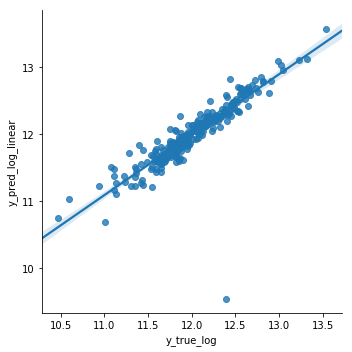

In [60]:
# Plot prediction
sns.lmplot(data=results, x='y_true_log', y='y_pred_log_linear')

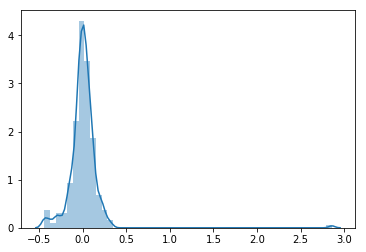

In [61]:
# Plot residuals
sns.distplot(results['y_true_log'] - results['y_pred_log_linear'])

In [62]:
# skewness
(results['y_true_log'] - results['y_pred_log_linear']).skew()

8.572084643064365

**This is the end of the exercise.**

### Bonus II: Linear Regression with Lasso regularization
Compute a linear Regression model which includes a regularization term. You can think of such a term as a penalty term which disfavors many features and therefore sets some coefficients to zero if the features are not very useful.

Hence, do similar steps as in Bonus I. The model is called Lasso and can be found in the module sklearn.linear_model.

In [63]:
# Import model and create instance
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42)

In [64]:
# Train model
lasso.fit(X_train, y_train_log)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
# Compute predictions
lasso_pred = lasso.predict(X_test)

In [66]:
# Compute r2_score
r2_score(y_test_log, lasso_pred)

0.8017965796542399

In [67]:
# Add prediction to result df
results['y_pred_log_lasso'] = lasso_pred

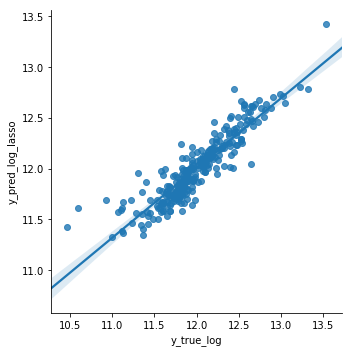

In [68]:
# Plot prediction
sns.lmplot(data=results, x='y_true_log', y='y_pred_log_lasso')

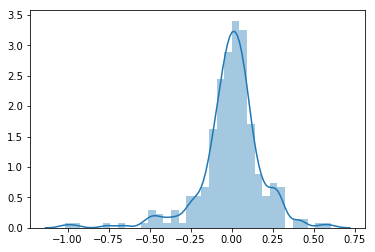

In [69]:
# Plot residuals
sns.distplot(results['y_true_log'] - results['y_pred_log_lasso'])